## Observations and Insights 

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from matplotlib.pyplot import figure
from scipy import stats

# Study data files
mouse_metadata_path = "Instructions/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Instructions/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study = pd.merge(mouse_metadata, study_results, how='outer')


# Display the data table for preview
combined_mouse_study.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [64]:
# Checking the number of mice.
mice = combined_mouse_study["Mouse ID"].value_counts()
num_mice = len(mice)
num_mice

249

In [65]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combined_mouse_study.loc[combined_mouse_study.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()


In [66]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_id = pd.DataFrame(dup_mice)
dup_mouse_id

,0
0,g989


In [67]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = combined_mouse_study[combined_mouse_study['Mouse ID'].isin(dup_mice)==False]

In [68]:
# Checking the number of mice in the clean DataFrame.
total_mice = clean_mice_df["Mouse ID"].value_counts()
total_mice = len(total_mice)
total_mice

248

## Summary Statistics

In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
reg_mean = clean_mice_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
reg_mean

reg_median = clean_mice_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
reg_median

reg_var = clean_mice_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
reg_var

reg_sd = clean_mice_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
reg_sd

reg_sem = clean_mice_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
reg_sem

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_df = pd.DataFrame({"Mean": reg_mean, "Median": reg_median, "Variance": reg_var, "Standard Deviation": reg_sd, "SEM": reg_sem})
summary_df

summary_df.to_csv("SummaryTable1.csv", index=False, header=True)


In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_single = clean_mice_df.groupby('Drug Regimen')
summary_df_2 = summary_single.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
summary_df_2


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [71]:
combined_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [72]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#assuming a new line of data was added for each measurement
num_measurements = clean_mice_df["Drug Regimen"].value_counts()
num_measurements


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of Measurements Taken per Drug Regimen')

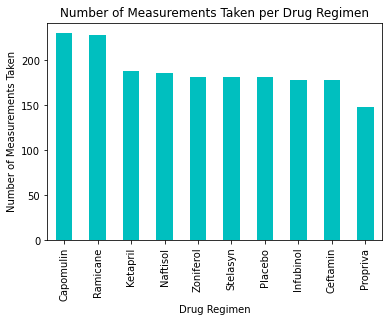

In [73]:
plot_pandas = num_measurements.plot.bar(color='c')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")
plt.title("Number of Measurements Taken per Drug Regimen")

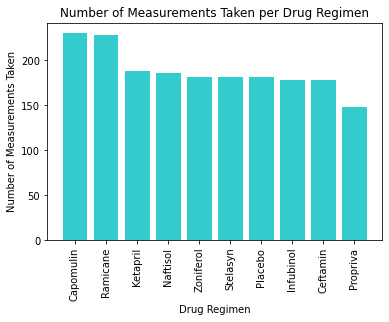

In [74]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = num_measurements.index.values
y_axis = num_measurements.values

plt.bar(x_axis, y_axis, color='c', alpha=0.8, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")
plt.title("Number of Measurements Taken per Drug Regimen")
plt.xticks(rotation="vertical")
plt.savefig("Instructions/Images/measurements.png", bbox_inches = "tight")
plt.show()

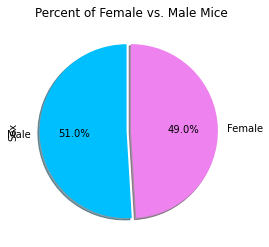

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = clean_mice_df["Sex"].value_counts()
colors = ["deepskyblue", "violet"]
explode = (0.05,0)
mouse_sex.plot.pie(explode=explode, colors = colors, autopct = "%1.1f%%", startangle=90, shadow=True)
plt.title("Percent of Female vs. Male Mice")
plt.show()

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex


Male      958
Female    922
Name: Sex, dtype: int64

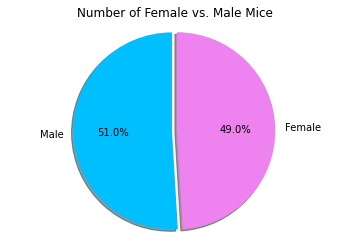

In [77]:
labels = ['Male', 'Female']
sizes = mouse_sex.values
explode = (0.05,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=90, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Number of Female vs. Male Mice")
plt.savefig("Instructions/Images/male_vs_female_pie.png", bbox_inches = "tight")

## Quartiles, Outliers and Boxplots

In [78]:
num_measurements


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [79]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
last_tp = clean_mice_df.groupby('Mouse ID').max()['Timepoint']
vol = pd.DataFrame(last_tp)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge = pd.merge(vol, clean_mice_df, on=("Mouse ID", "Timepoint"), how="left")
merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [80]:
# CAPOMULIN TUMORS 
capomulin_tumors = merge.loc[merge["Drug Regimen"] == "Capomulin", :]["Tumor Volume (mm3)"]
ca_lowerq = np.percentile(capomulin_tumors, 25, interpolation = 'midpoint')
ca_upperq = np.percentile(capomulin_tumors, 75, interpolation = 'midpoint')
ca_median = np.percentile(capomulin_tumors, 50, interpolation = 'midpoint')
ca_iqr = ca_upperq - ca_lowerq
ca_lower_bound = ca_lowerq - (1.5*ca_iqr)
ca_upper_bound = ca_upperq + (1.5*ca_iqr)

print("CAPOMULIN")
print("")
print(f"Lower quartile of tumor volume for mice on Capomulin: {ca_lowerq}")
print(f"Upper quartile of tumor volume for mice on Capomulin: {ca_upperq}")
print(f"Interquartile Range for tumor volume for mice on Capomulin: {ca_iqr}")
print("")
print(f"Median tumor volume for mice on Capomulin: {ca_median}")
print("")
print(f"Values below {ca_lower_bound} could be outliers for Capomulin")
print(f"Values above {ca_upper_bound} could be outliers for Capomulin")
print("----------------------------------------------------------------------")

# RAMICANE TUMORS 
ramicane_tumors = merge.loc[merge["Drug Regimen"] == "Ramicane", :]["Tumor Volume (mm3)"]
r_lowerq = np.percentile(ramicane_tumors, 25, interpolation = 'midpoint')
r_upperq = np.percentile(ramicane_tumors, 75, interpolation = 'midpoint')
r_median = np.percentile(ramicane_tumors, 50, interpolation = 'midpoint')
r_iqr = r_upperq - r_lowerq
r_lower_bound = r_lowerq - (1.5*r_iqr)
r_upper_bound = r_upperq + (1.5*r_iqr)

print("RAMICANE")
print("")
print(f"Lower quartile of tumor volume for mice on Ramicane: {r_lowerq}")
print(f"Upper quartile of tumor volume for mice on Ramicane: {r_upperq}")
print(f"Interquartile Range for tumor volume for mice on Ramicane: {r_iqr}")
print("")
print(f"Median tumor volume for mice on Ramicane: {r_median}")
print("")
print(f"Values below {r_lower_bound} could be outliers for Ramicane")
print(f"Values above {r_upper_bound} could be outliers for Ramicane")
print("----------------------------------------------------------------------")

# INFUBINOL TUMORS 
infubinol_tumors = merge.loc[merge["Drug Regimen"] == "Infubinol", :]["Tumor Volume (mm3)"]
i_lowerq = np.percentile(infubinol_tumors, 25, interpolation = 'midpoint')
i_upperq = np.percentile(infubinol_tumors, 75, interpolation = 'midpoint')
i_median = np.percentile(infubinol_tumors, 50, interpolation = 'midpoint')
i_iqr = i_upperq - i_lowerq
i_lower_bound = i_lowerq - (1.5*i_iqr)
i_upper_bound = i_upperq + (1.5*i_iqr)

print("IBUFINOL")
print("")
print(f"Lower quartile of tumor volume for mice on Infubinol: {i_lowerq}")
print(f"Upper quartile of tumor volume for mice on Infubinol: {i_upperq}")
print(f"Interquartile Range for tumor volume for mice on Infubinol: {i_iqr}")
print("")
print(f"Median tumor volume for mice on Infubinol: {i_median}")
print("")
print(f"Values below {i_lower_bound} could be outliers for Infubinol")
print(f"Values above {i_upper_bound} could be outliers for Infubinol")
print("----------------------------------------------------------------------")

# CEFTAMIN TUMORS 
ceftamin_tumors = merge.loc[merge["Drug Regimen"] == "Ceftamin", :]["Tumor Volume (mm3)"]
ce_lowerq = np.percentile(ceftamin_tumors, 25, interpolation = 'midpoint')
ce_upperq = np.percentile(ceftamin_tumors, 75, interpolation = 'midpoint')
ce_median = np.percentile(ceftamin_tumors, 50, interpolation = 'midpoint')
ce_iqr = ce_upperq - ce_lowerq
ce_lower_bound = ce_lowerq - (1.5*ce_iqr)
ce_upper_bound = ce_upperq + (1.5*ce_iqr)

print("CEFTAMIN")
print("")
print(f"Lower quartile of tumor volume for mice on Ceftamin: {ce_lowerq}")
print(f"Upper quartile of tumor volume for mice on Ceftamin: {ce_upperq}")
print(f"Interquartile Range for tumor volume for mice on Ceftamin: {ce_iqr}")
print("")
print(f"Median tumor volume for mice on Ceftamin: {ce_median}")
print("")
print(f"Values below {ce_lower_bound} could be outliers for Ceftamin")
print(f"Values above {ce_upper_bound} could be outliers for Ceftamin")
print("----------------------------------------------------------------------")


CAPOMULIN

Lower quartile of tumor volume for mice on Capomulin: 32.37735684
Upper quartile of tumor volume for mice on Capomulin: 40.1592203
Interquartile Range for tumor volume for mice on Capomulin: 7.781863460000004

Median tumor volume for mice on Capomulin: 38.125164399999996

Values below 20.70456164999999 could be outliers for Capomulin
Values above 51.83201549 could be outliers for Capomulin
----------------------------------------------------------------------
RAMICANE

Lower quartile of tumor volume for mice on Ramicane: 31.56046955
Upper quartile of tumor volume for mice on Ramicane: 40.65900627
Interquartile Range for tumor volume for mice on Ramicane: 9.098536719999998

Median tumor volume for mice on Ramicane: 36.56165229

Values below 17.912664470000003 could be outliers for Ramicane
Values above 54.30681135 could be outliers for Ramicane
----------------------------------------------------------------------
IBUFINOL

Lower quartile of tumor volume for mice on Infubinol

In [81]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
    

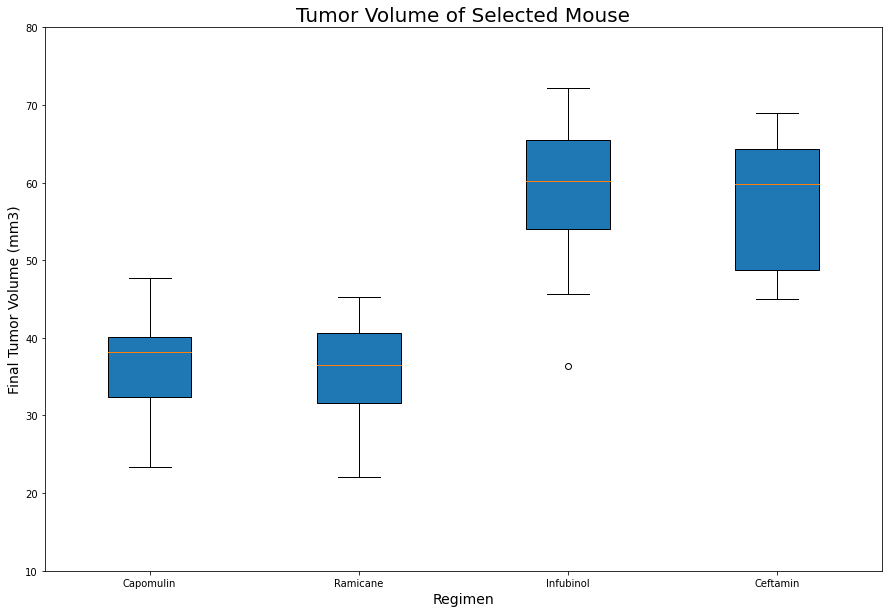

In [82]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume of Selected Mouse',fontsize =20)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Regimen',fontsize = 14)
ax1.boxplot(tumor_vol_data, labels=treatments, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)

plt.savefig("Instructions/Images/box_plot.png", bbox_inches = "tight")

plt.show()

## Line and Scatter Plots

In [83]:
mouse_f966 = capomulin_df.loc[capomulin_df["Mouse ID"] == "f966", :]
mouse_f966.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
60,f966,Capomulin,Male,16,17,0,45.000000,0
61,f966,Capomulin,Male,16,17,5,38.796474,0
62,f966,Capomulin,Male,16,17,10,35.624403,0
63,f966,Capomulin,Male,16,17,15,32.623003,0
64,f966,Capomulin,Male,16,17,20,30.485985,0


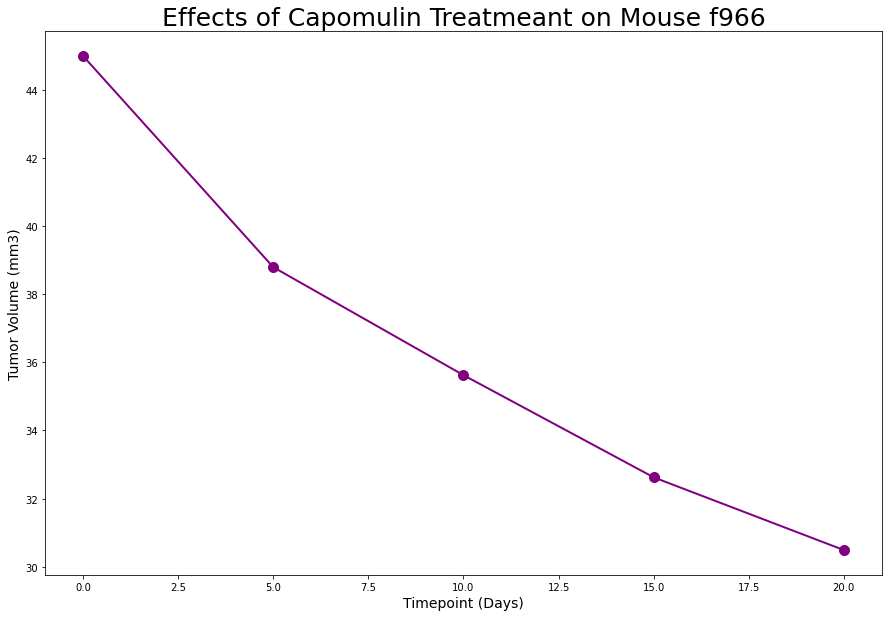

In [84]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_tp = mouse_f966["Timepoint"]
tum_vol = mouse_f966["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Effects of Capomulin Treatmeant on Mouse f966',fontsize =25)
plt.plot(mouse_tp, tum_vol,linewidth=2, markersize=10,marker="o",color="purple")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)


plt.savefig("Instructions/Images/line_graph.png", bbox_inches = "tight")
plt.show()

Text(0, 0.5, 'Weight (g)')

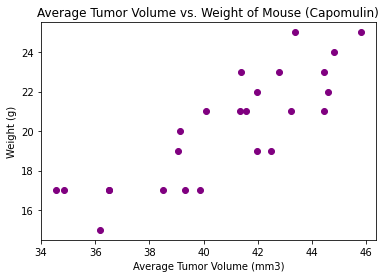

In [85]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_tum_vol = capomulin_df.groupby(['Mouse ID']).mean()

marker_size = 10
plt.scatter(avg_tum_vol['Tumor Volume (mm3)'], avg_tum_vol['Weight (g)'], color="purple")
plt.title('Average Tumor Volume vs. Weight of Mouse (Capomulin)')
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Weight (g)')

## Correlation and Regression

In [86]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_tum_vol['Weight (g)'],avg_tum_vol['Tumor Volume (mm3)'])
print(f"The correlation coefficient between weight and average tumor volume for a mouse on Capomulin is {round(correlation[0],2)}")

The correlation coefficient between weight and average tumor volume for a mouse on Capomulin is 0.84


The r-squared is: 0.709
y = 0.74 x + -10.15


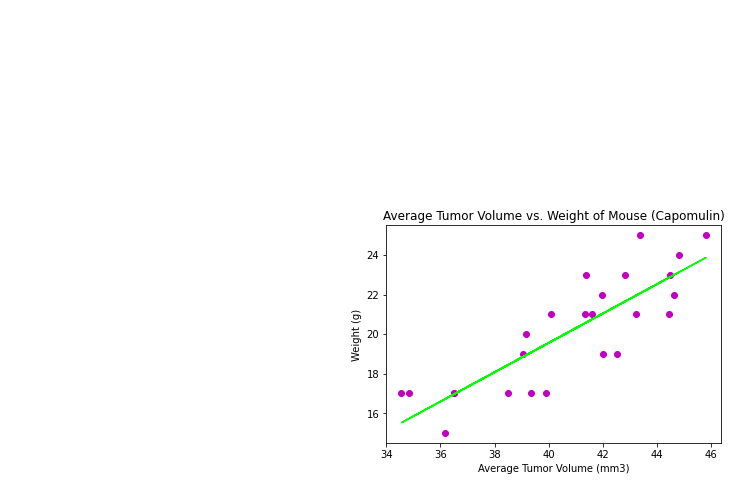

In [87]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_tum_vol["Tumor Volume (mm3)"],avg_tum_vol["Weight (g)"])
regress_values = avg_tum_vol["Tumor Volume (mm3)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_tum_vol["Tumor Volume (mm3)"],avg_tum_vol["Weight (g)"],color='m')
plt.plot(avg_tum_vol["Tumor Volume (mm3)"], regress_values, color='lime')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.title('Average Tumor Volume vs. Weight of Mouse (Capomulin)')
print(f"The r-squared is: {round(rvalue**2,3)}")
print(line_eq)
plt.show()